In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

# Clone Repo

In [ ]:
!mkdir /mydrive/mask_rcnn

mkdir: cannot create directory ‘/mydrive/mask_rcnn’: File exists


In [ ]:
cd /mydrive/mask_rcnn

/content/gdrive/My Drive/mask_rcnn


In [ ]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2

fatal: destination path 'Mask_RCNN-TF2' already exists and is not an empty directory.


In [ ]:
cd /mydrive/mask_rcnn/Mask_RCNN-TF2/

/content/gdrive/My Drive/mask_rcnn/Mask_RCNN-TF2


# Install libraries and Download pictures

In [ ]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 4.7 MB/s 
     |████████████████████████████████| 298 kB 44.7 MB/s 


In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [ ]:
cd /mydrive/mask_rcnn/

/content/gdrive/My Drive/mask_rcnn


# Prepare Model

# 2022 - compatibility update

In [ ]:
import os #just another way to navegate through folders - using python
os.chdir('/mydrive/mask_rcnn/Mask_RCNN-TF2/samples')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib
import coco
#import importlib
#importlib.reload(modellib)
from mrcnn.config import Config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version


%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# Set Config parameters for Inference





In [ ]:
class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "coco"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Uncomment to train on 8 GPUs (default is 1)
    # GPU_COUNT = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 80  # COCO has 80 classes

class InferenceConfig(CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    ############################### CHANGE HYPERPARAMETERS HERE ##################
    RPN_NMS_THRESHOLD = 0.01
    DETECTION_MIN_CONFIDENCE = 0.7
    DETECTION_NMS_THRESHOLD = 0.7
    

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.7
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
 # Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead


In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Prediction and Visualization

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


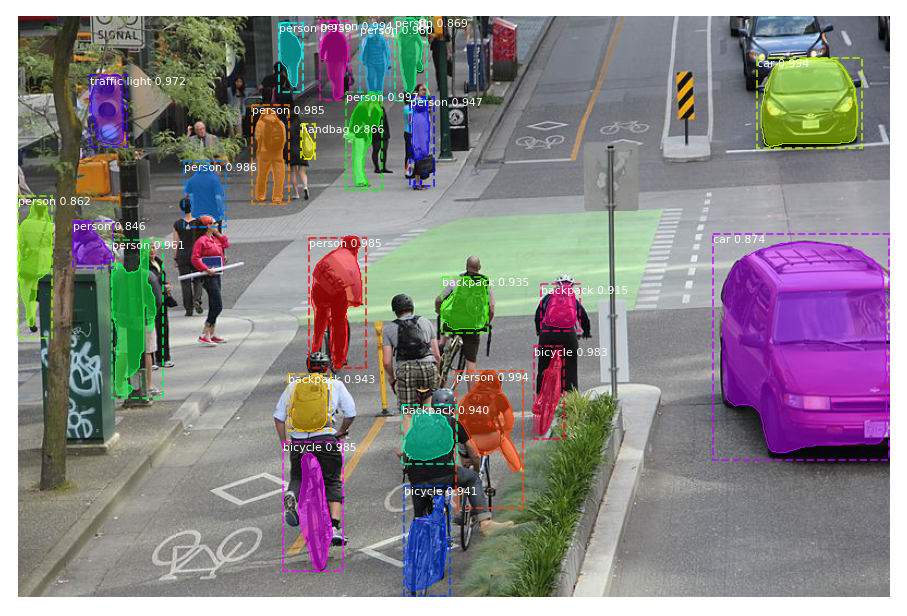

In [ ]:
path = '/mydrive/mask_rcnn/street_tutorial.jpeg'
#'/mydrive/mask_rcnn/street.jpg'
#../images/8829708882_48f263491e_z.jpg'
image = skimage.io.imread(path)

# Run detection
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [ ]:
print('Numero de objetos encontrados: ', len(r['rois']))

Numero de objetos encontrados:  24


# Exercise
---
1) **Test the Mask-RCNN on an image of your choice**

obs: Make sure every known object is detected by changing config parameters (thresholds)

2) Or **Test the Mask-RCNN on street_tutorial.jpeg using the config parameters given in the shared document** 

[Paste your result in this shared document](https://docs.google.com/document/d/1rlAIbE_DdYP-BKfV4_Z5nKXwYnGdykGbuqZ0M9kSFdU/edit?usp=sharing)



# PART 2: **Background Removal application** 

In [ ]:
bigfolder = "/content/gdrive/MyDrive/mask_rcnn/train"
smallfolder = os.listdir(bigfolder)
smallfolder

['1', '3', '2']

In [ ]:
# # For folders within a folder

# path1 = "/content/gdrive/MyDrive/mask_rcnn/train/1"
# path2 = "/content/gdrive/MyDrive/mask_rcnn/train_mask/1"

# listing = os.listdir(path1)    

# p = Pool(7) # process 5 images simultaneously

# def process_fpath(path):
# im = Image.open(path1, path)

In [ ]:
# For one folder

import cv2 as cv
import skimage.io
DIR = '/mydrive/mask_rcnn/1/'
for i in listing:
  image = skimage.io.imread( DIR + i)
  results = model.detect([image], verbose=0)
  r = results[0]
  mask = segment(image, r)
  cv.imwrite(f'/content/gdrive/MyDrive/mask_rcnn/1_mask/{i}', mask)

# path = '/mydrive/mask_rcnn/327.jpg'
#'/mydrive/mask_rcnn/street_tutorial.jpeg'
#../images/8829708882_48f263491e_z.jpg'
# image = skimage.io.imread(path)

# Run detection
# results = model.detect([image], verbose=0)

# Visualize results
# r = results[0]
# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
# For multiple folders in a folder in drive

import cv2 as cv
import skimage.io
bfolder = "/content/gdrive/MyDrive/mask_rcnn/data/test/abnormal/"
sfolder = os.listdir(bfolder)
nfolder = "/content/gdrive/MyDrive/mask_rcnn/data/test_mask/abnormal/"

for folder in sfolder: 
  folname = os.makedirs(nfolder + folder)
  imgnames = os.listdir(bfolder + folder)
  for i in imgnames:
    image = skimage.io.imread( bfolder + folder + "/" + i)
    results = model.detect([image], verbose=0)
    r = results[0]
    mask = segment(image, r)
    cv.imwrite(f'/content/gdrive/MyDrive/mask_rcnn/data/test_mask/abnormal/{folder}/{i}', mask)

In [ ]:
def segment(image, r):
  idx = r['scores'].argmax()
  mask = r['masks'][:,:,idx]
  mask = np.stack((mask,)*3, axis=-1)
  mask = mask.astype('uint8')
  bg =  mask * 255 
  mask_img = image*mask
  result =  bg
  return result

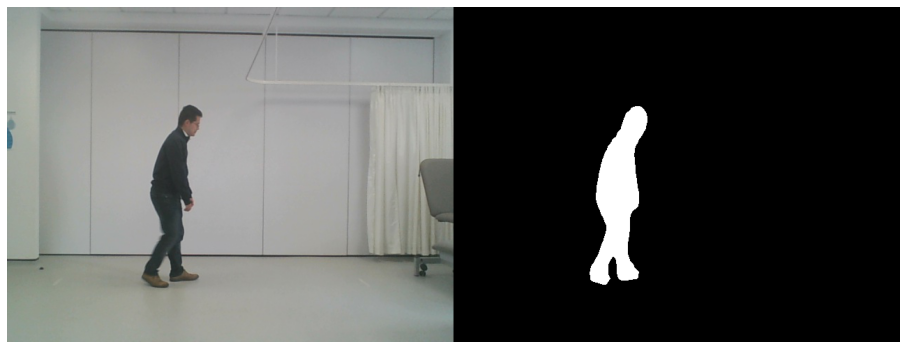

In [ ]:
segmentation = segment(image, r)
plt.subplots(1, figsize=(16, 16))
plt.axis('off')
plt.imshow(np.concatenate([image, segmentation], axis = 1))

In [ ]:
cv.imwrite(f'/content/gdrive/MyDrive/mask_rcnn/1_mask_{i}', mask)

True

# References
---

This Mask-RCNN colab notebook was based on: 

> Matterport [demo notebook](https://github.com/matterport/Mask_RCNN/blob/master/samples/demo.ipynb) from [/matterport/Mask_RCNN repo](https://github.com/matterport/Mask_RCNN)







> Mark Jay's 3-part [video series](https://www.youtube.com/watch?v=2TikTv6PWDw&list=PLX-LrBk6h3wRAF22jBUxDgOvyhIgLN4Cg) and [markjay4k/Mask-RCNN-series repo](https://github.com/markjay4k/Mask-RCNN-series)




> [Mask-RCNN-Shiny Project](https://github.com/huuuuusy/Mask-RCNN-Shiny)




Recommended reading

> [Article](https://engineering.matterport.com/splash-of-color-instance-segmentation-with-mask-r-cnn-and-tensorflow-7c761e238b46) on Matterport's blog with implementation details


> Computer Vision — A journey from CNN to Mask R-CNN and YOLO - [Part 1](https://towardsdatascience.com/computer-vision-a-journey-from-cnn-to-mask-r-cnn-and-yolo-1d141eba6e04) and [Part 4](https://towardsdatascience.com/computer-vision-instance-segmentation-with-mask-r-cnn-7983502fcad1)



